In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 5
%autosave 15

import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

import math
import sklearn
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

Autosaving every 15 seconds


In [3]:
# Load data
boston = datasets.load_boston()

target = boston.target
boston = pd.DataFrame(data=boston.data, columns=boston.feature_names)

print(boston.shape, target.shape)

(506, 13) (506,)


In [4]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(boston, target, test_size=0.1, random_state=23)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(455, 13) (455,)
(51, 13) (51,)


(array([  21.,   55.,   82.,  154.,   84.,   41.,   30.,    8.,   10.,   21.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

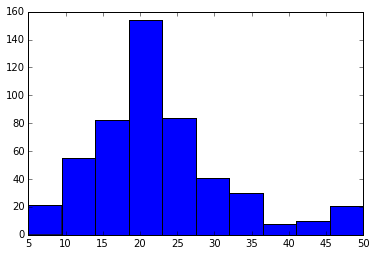

In [7]:
plt.hist(target)

In [8]:
svm = SVR()
svm.fit(X_train, Y_train)

print(svm.score(X_train, Y_train))
print(svm.score(X_test, Y_test))

0.151078328408
-0.0814863389949


In [9]:
def target_features_scatter(target, data_frame, in_col=4):
    number_of_columns = data_frame.shape[1]
    
    rows = nrows=math.ceil(number_of_columns/in_col)
    cols = in_col
    
    f, axes = plt.subplots(nrows=rows, ncols=cols)
    
    for row in range(rows):
        for col in range(cols):
            
            if cols*row+col == number_of_columns:
                break
            
            column = data_frame.iloc[:,cols*row+col]
            column_name = column.name
            
            axes[row][col].set_title(column_name)
            axes[row][col].scatter(column, target)
            f.set_size_inches(18.5, 10.5)
            f.tight_layout()

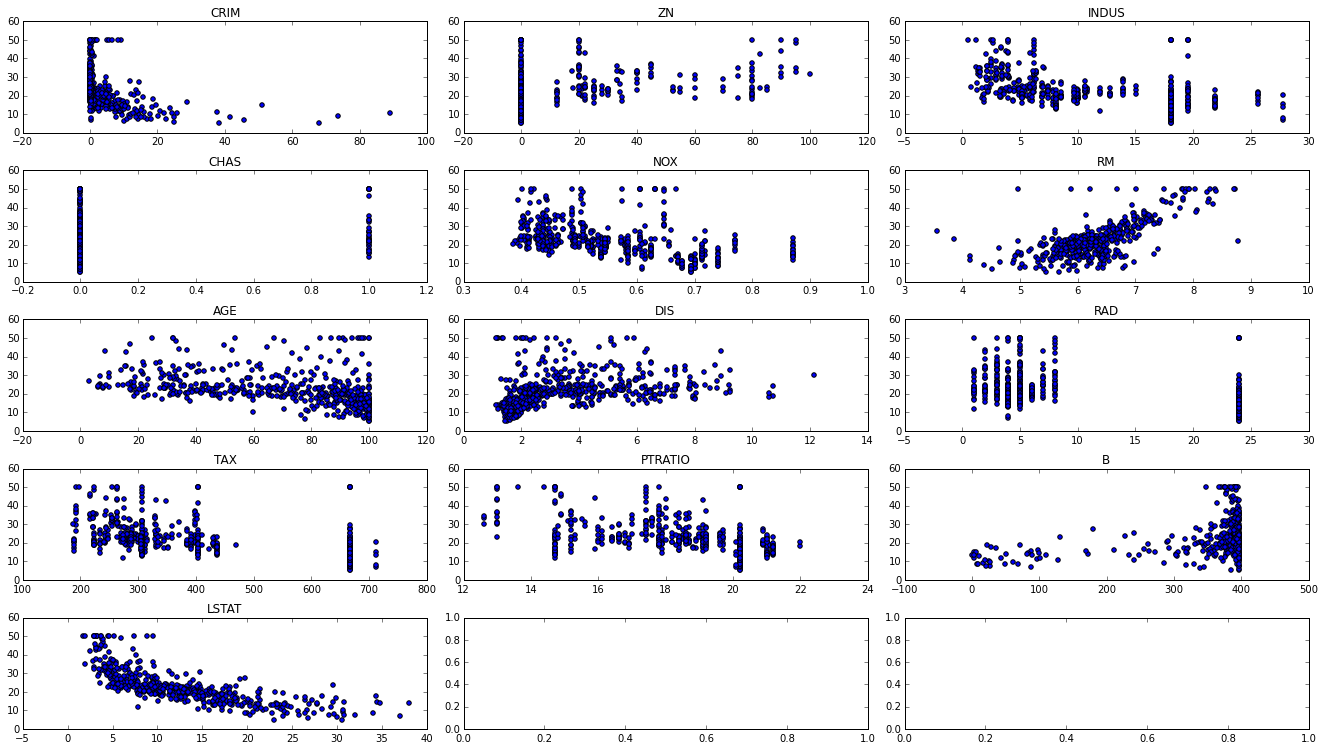

In [10]:
target_features_scatter(target, boston, in_col=3)

# Задачи:
1. Обучить SVR, DT, RF, GBM
2. Запустить GridSearch
3. построить PCA

In [11]:
svm?

In [14]:
svm.kernel = 'linear'
svm.fit(X_train, Y_train)
svm.C = 0.8
svm.epsilon = 0.2

print(svm.score(X_train, Y_train))
print(svm.score(X_test, Y_test))

0.709924570286
0.634271742283
